In [1]:
# loading packages
!pip install mne
import mne
import numpy as np
import os
import matplotlib.pyplot as plt

from pathlib import Path

from mpl_toolkits.axes_grid1 import make_axes_locatable
%matplotlib inline

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 161.7/161.7 kB 2.9 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 54.8 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 48.5 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.0/18.0 MB 55.2 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.0/63.0 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.2/38.2 MB 44.4 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.3/78.3 kB 1.8 MB/s eta 0:00:00eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 309.2/309.2 kB 2.6 MB/s eta 0:

## 1. Data Processing 

In [2]:
# reading the file & loading in the data
own_data_raw_file = os.path.join(os.getcwd(), 'preprocessed_data', 'preprocessed_data_ica.fif')
raw = mne.io.read_raw_fif(own_data_raw_file) # raw is an MNE object that contains the data of the class Raw
raw.load_data()
#eog=('HEOG', 'VEOG'), misc=['41']


Opening raw data file /work/AkaranSivakumar#4825/CogNeuro24/own_experiment/preprocessed_data/preprocessed_data_ica.fif...
    Read a total of 1 projection items:
        Average EEG reference (1 x 26) active
    Range : 0 ... 852979 =      0.000 ...   852.979 secs
Ready.
Reading 0 ... 852979  =      0.000 ...   852.979 secs...


/tmp/ipykernel_2153/3505301429.py:3: RuntimeWarning: This filename (/work/AkaranSivakumar#4825/CogNeuro24/own_experiment/preprocessed_data/preprocessed_data_ica.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(own_data_raw_file) # raw is an MNE object that contains the data of the class Raw


<Raw | preprocessed_data_ica.fif, 29 x 852980 (853.0 s), ~188.8 MB, data loaded>

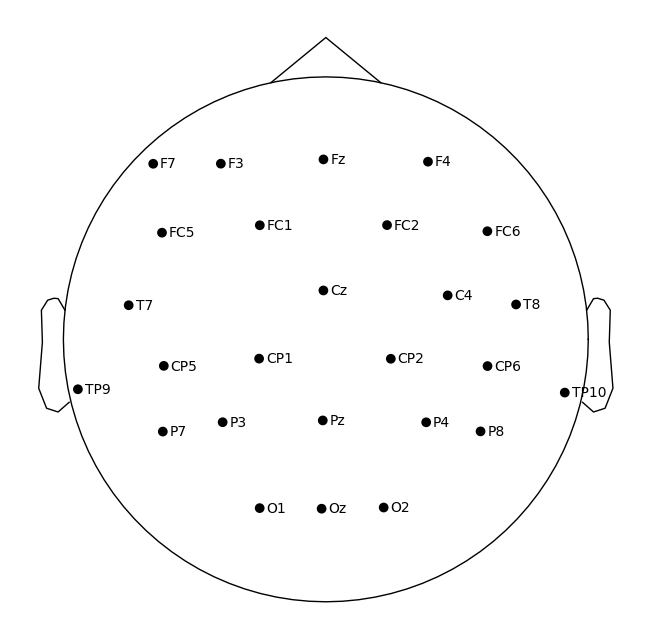

Using matplotlib as 2D backend.


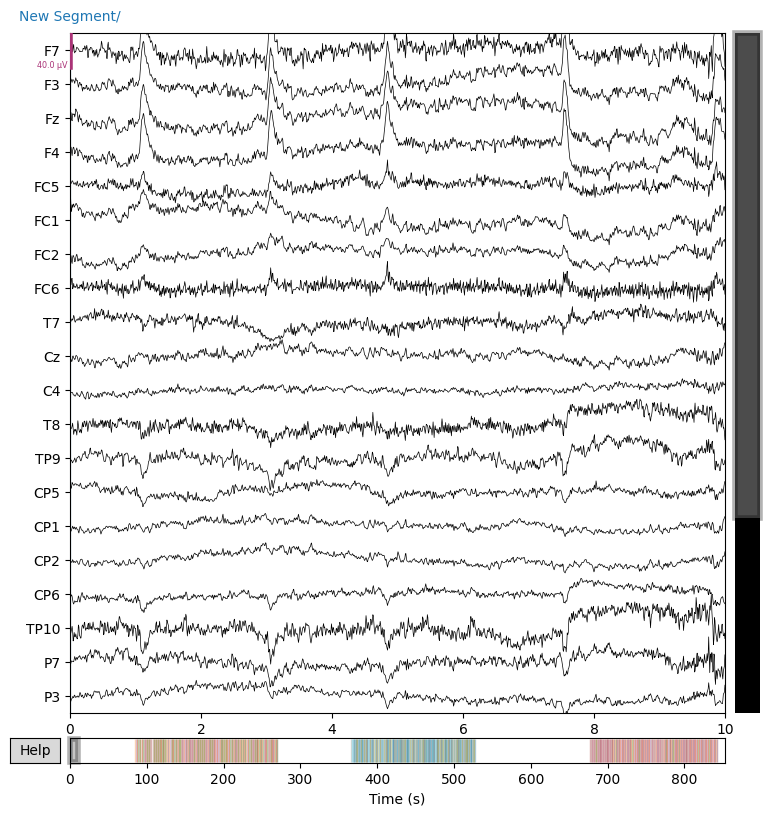

In [3]:
#raw.info['bads'] = ['C3', 'Fp1', 'Fp2', 'F8'] # this was edited after checking the data out and seeing these channels were bad - 
raw.pick(['eeg', 'eog'], exclude='bads')

montage = mne.channels.make_standard_montage('standard_1020')
raw.set_montage(montage, verbose=False)

raw.load_data()
raw.plot_sensors(show_names=True);
raw.plot();

## Plotting the raw data

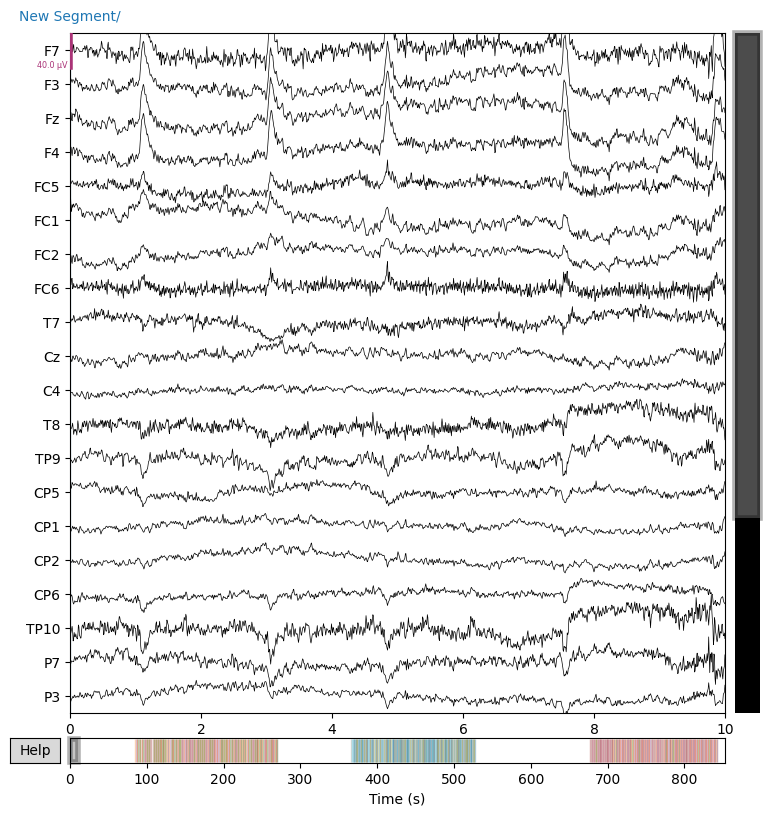

In [4]:
raw.plot();

## Common average reference 


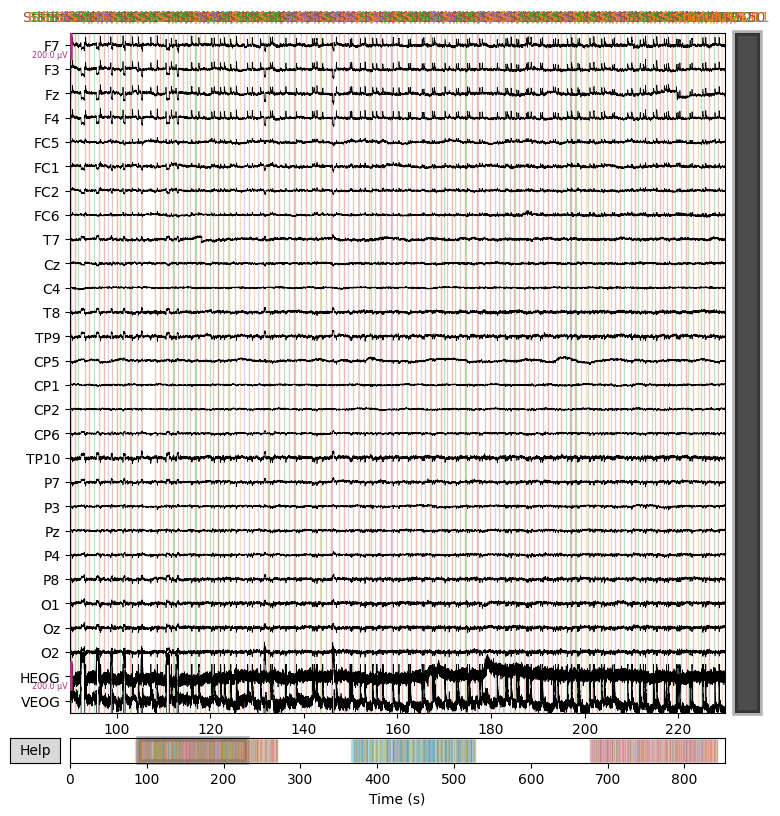

In [5]:
# common average reference
#raw.set_eeg_reference('average', projection=True)

# applying the reference
#raw.apply_proj()

# plot the data to check that it looks sensical
raw.plot(start= 90, duration= 140, n_channels=29, scalings=100e-6);

## Now we filter

In [6]:
raw.filter(0.1, None)
raw.filter(None, 40)

Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 0.1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Filter length: 33001 samples (33.001 s)



Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 331 samples (0.331 s)



<Raw | preprocessed_data_ica.fif, 28 x 852980 (853.0 s), ~182.3 MB, data loaded>

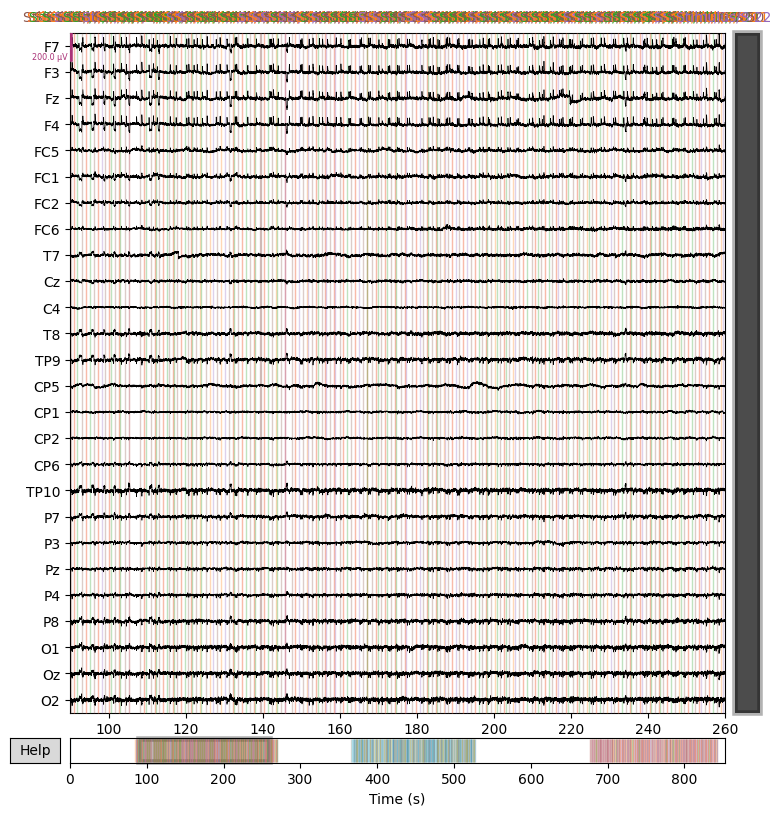

In [7]:
#Plotting after the filtering! It looks way better 
raw.info['bads'] = ['HEOG', 'VEOG'] # this was edited after checking the data out and seeing these channels were bad - 
raw.pick(['eeg'], exclude='bads')
raw.plot(start=90, duration=170, n_channels=33, scalings=100e-6);

## Importing our new data

In [32]:
#We now load in the new data - OUR DATA
import pandas as pd

df1 = pd.read_csv('/work/raw/own_experiments/logfiles/group10/logfile_group10_1_2024-02-29_11h28.45.616.csv')
df2 = pd.read_csv('/work/raw/own_experiments/logfiles/group10/logfile_group10_2_2024-02-29_11h34.42.142.csv')
df3 = pd.read_csv('/work/raw/own_experiments/logfiles/group10/logfile_group10_3_2024-02-29_11h38.27.753.csv')

combined_df = pd.concat([df1, df2, df3], axis=0)

In [33]:
# splitting the data into 3 different dataframes, one for each different value in "duration"
# Create a dictionary to hold the DataFrames
duration_dataframes = {}
# Split the data into different DataFrames based on unique values in the "duration" column
duration_groups = combined_df.groupby('Duration')

# Iterate over the groups and store each DataFrame in the dictionary
for duration, group_df in duration_groups:
    duration_dataframes[duration] = group_df.copy()

# Save each DataFrame as variables
dataframe_easy = duration_dataframes[60]
dataframe_medium = duration_dataframes[36]
dataframe_hard = duration_dataframes[12]

We have 14 columns in our "combined_df". These are: 

- Time_Stamp: Denotes the time at which the row was appended (format:'%Y-%m-%d_%H:%M:%S')
- Duration: Denotes the number of frames, the stimulus was shown 
- ID: Describes the ID of the participant
- Age: Age of Participant at time of experiment (in years)
- Gender: Gender of Participant
- Answer: Denotes the answer given by participant ('Present' if the participant believed the Target shape was present in the stimulus and 'Not Present' if the participant believes the shape was not present in the stimulus)
- Response: Describes the keypress of the participant ('y' = **Present** and 'n' = **Not Present**)
- Correct: Denotes whether the answer provided by participant was correct or not; **0 = Incorrect and 1 = Correct**
- RT: Value that encodes the time taken by participant to answer whether target shape was in stimulus. (in seconds)
- Condition: Describes the condition the participant was exposed to, in this run of the within-subject design. (**either Shape, Color, or Joint**)
- Stimulus_trigger: value encoded for trigger for compatibility with EEG hardware/software. This trigger is sent, when stimulus is shown 
- Target_trigger: value encoded for trigger for compatibility with EEG hardware/software. This trigger is sent, when target is shown.
- answer_trigger: value encoded for trigger for compatibility with EEG hardware/software. This trigger is sent, when participant answers.
- pause_trigger: value encoded for trigger for compatibility with EEG hardware/software. This trigger is sent, when pause between trials ends. **This trigger was not encoded properly in the script, so it is not visible/distinguishable in the raw data**

In [34]:
df1

Time_Stamp  Duration         ID  Age  Gender       Answer  \
0   2024-02-29_11:30:36        60  group10_1   24  Female      Present   
1   2024-02-29_11:30:40        60  group10_1   24  Female  Not present   
2   2024-02-29_11:30:43        36  group10_1   24  Female  Not present   
3   2024-02-29_11:30:46        60  group10_1   24  Female  Not present   
4   2024-02-29_11:30:49        60  group10_1   24  Female      Present   
..                  ...       ...        ...  ...     ...          ...   
65  2024-02-29_11:33:30        36  group10_1   24  Female      Present   
66  2024-02-29_11:33:32        12  group10_1   24  Female  Not present   
67  2024-02-29_11:33:35        36  group10_1   24  Female      Present   
68  2024-02-29_11:33:37        60  group10_1   24  Female      Present   
69  2024-02-29_11:33:40        12  group10_1   24  Female  Not present   

   Response  Correct        RT Condition  Stimulus_trigger  Target_trigger  \
0         y        0  1.231599     Shape              11.0            22.0   
1         n        0  1.332034     Shape              11.0            21.0   
2         n        0  1.334981     Shape              11.0            21.0   
3         n        0  1.065279     Shape              11.0            21.0   
4         y        0  0.846170     Shape              11.0            22.0   
..      ...      ...       ...       ...               ...             ...   
65        y        0  0.781346     Shape              11.0            22.0   
66        n        0  1.025614     Shape              11.0            21.0   
67        y        0  0.764531     Shape              11.0            22.0   
68        y        1  0.881723     Shape              11.0            21.0   
69        n        0  0.950924     Shape              11.0            21.0   

    answer_trigger  pause_trigger  
0             50.0           31.0  
1             50.0           31.0  
2             50.0           31.0  
3             50.0           31.0  
4             50.0           31.0  
..             ...            ...  
65            50.0           31.0  
66            50.0           31.0  
67            50.0           31.0  
68            50.0           31.0  
69            50.0           31.0  

[70 rows x 14 columns]

## Then we epoch the data

In [35]:
## Now Epoch the data

# What are triggers 59, 255 and 251? Are they spurious?

# event dictionary
event_id = {'stimulus/shape/': 11, # Trigger code for stimulus in shape condition
            'present/target/shape': 21, # Trigger code for target present in stimulus  in shape condition
            'notpresent/target/shape': 22, # Trigger code for target not present in stimulus  in shape condition
            #'fix_cross/shape':31, # Trigger code for fixation point before trial  in shape condition
            'answer/shape': 50, # Trigger code for Participant answer  in shape condition
            'stimulus/color': 111, # Trigger code for stimulus in color condition
            'present/target/color': 121, # Trigger code for target present in stimulus in color condition
            'notpresent/target/color': 122, # Trigger code for target not present in stimulus in color condition
            #'fix_cross/color': 131, # Trigger code for fixation point before trial in color condition
            'answer/color': 150, # Trigger code for Participant answer in color condition
            'stimulus/joint': 211, # Trigger code for stimulus in joint condition
            'present/target/joint': 221, # Trigger code for target present in stimulus in joint condition
            'notpresent/target/joint': 222, # Trigger code for target not present in stimulus in joint condition
            #'fix_cross/joint': 231, # Trigger code for fixation point before trial in joint condition
            'answer/joint':250 # Trigger code for Participant answer in joint condition
            }

In [36]:
# creating events
events, event_dict = mne.events_from_annotations(raw) 
#print(event_dict)

Non-RawBrainVision raw using branvision markers
Used Annotations descriptions: ['New Segment/', 'Stimulus/S 11', 'Stimulus/S 21', 'Stimulus/S 22', 'Stimulus/S 50', 'Stimulus/S 59', 'Stimulus/S111', 'Stimulus/S121', 'Stimulus/S122', 'Stimulus/S150', 'Stimulus/S211', 'Stimulus/S221', 'Stimulus/S222', 'Stimulus/S250', 'Stimulus/S251', 'Stimulus/S255']


In [37]:
# Deleting spurious triggers...
# If dif < 2 for trigger onsets, reject preceding trial
dif_onsets = np.diff(events[:,0])
dif_idx = np.where(dif_onsets<2)[0]
events = np.delete(events   , dif_idx, axis = 0)
print('event number {} was rejected'.format(dif_idx))

event number [  4   8  12  16  20  24  31  35  39  43  47  51  64  68  72  76  83  87
  94  98 102 106 110 114 118 122 126 130 134 138 142 149 153 157 161 168
 175 179 183 187 191 195 202 209 213 217 221 225 229 236 240 244 251 255
 259 263 270 277 281 285 292 296 300 304 308 315 322 332 336 343 347 351
 355 359 363 367 371 375 379 383 393 400 404 411 415 419 423 427 431 435
 439 443 447 454 461 465 469 473 477 487 491 495 499 503 507 511 515 519
 526 533 537 541 545 549 553 557 561 565 569 573 577 587 594 598 602 609
 616 623 627 631 635 639 643 647 654 658 665 669 673 680 684 688 692 702
 706 710 714 718 722 726 733 737 741 745 749 753 757 761 768 772 776 780
 784 788] was rejected


In [38]:
# removing very first trigger/event from the event structure since it just marks the beginning of the file
events = events[events[:,2]!=99999,:]


In [39]:
len(events)/3
# should now be equal to 210 - cuz we have 3 triggers for each trial - and 210 = 3 x 70 trials (70 trials of each type of trial [shape, color and joint])


210.0

In [40]:
print(events[:100,:])
sanity_check = events[range(1,len(events),3),2] # extracting all the twenties cuz they're the values we can use for checking with the logfile(s)

[[ 84580      0     11]
 [ 85580      0     22]
 [ 86815      0     50]
 [ 87831      0     11]
 [ 88830      0     21]
 [ 90158      0     50]
 [ 91164      0     11]
 [ 91763      0     21]
 [ 93112      0     50]
 [ 94114      0     11]
 [ 95114      0     21]
 [ 96164      0     50]
 [ 97181      0     11]
 [ 98180      0     22]
 [ 99020      0     50]
 [100031      0     11]
 [100630      0     21]
 [101779      0     50]
 [102798      0     11]
 [102997      0     21]
 [104229      0     50]
 [105233      0     11]
 [105430      0     22]
 [108241      0     50]
 [109248      0     11]
 [109847      0     21]
 [110973      0     50]
 [111998      0     11]
 [112197      0     21]
 [113030      0     50]
 [114048      0     11]
 [115047      0     21]
 [115708      0     50]
 [116731      0     11]
 [116931      0     21]
 [117880      0     50]
 [118881      0     11]
 [119881      0     21]
 [120529      0     50]
 [121531      0     11]
 [121730      0     21]
 [122746      0 

In [41]:
sanity_check

array([ 22,  21,  21,  21,  22,  21,  21,  22,  21,  21,  21,  21,  21,
        21,  21,  22,  22,  21,  21,  21,  21,  21,  22,  22,  22,  21,
        22,  22,  21,  22,  21,  21,  21,  21,  22,  22,  21,  21,  22,
        22,  22,  21,  21,  21,  21,  22,  21,  21,  21,  22,  21,  21,
        21,  21,  22,  21,  21,  22,  21,  21,  21,  21,  21,  22,  21,
        22,  21,  22,  21,  21, 122, 122, 121, 121, 122, 121, 122, 121,
       121, 122, 121, 122, 121, 121, 121, 121, 122, 121, 121, 122, 121,
       121, 122, 121, 122, 121, 122, 121, 121, 121, 122, 122, 121, 121,
       121, 121, 122, 121, 121, 121, 121, 122, 122, 122, 122, 122, 122,
       121, 121, 121, 121, 121, 121, 122, 121, 122, 121, 121, 121, 121,
       121, 122, 121, 121, 121, 121, 121, 122, 121, 121, 222, 222, 222,
       221, 222, 222, 222, 222, 222, 222, 222, 222, 222, 222, 221, 222,
       222, 222, 222, 222, 222, 222, 222, 221, 222, 222, 222, 221, 222,
       222, 222, 222, 222, 222, 222, 222, 222, 222, 222, 222, 22

In [42]:
idx = 70
print(sanity_check[:idx])
print(df1['Target_trigger'])

df1['Sanity'] = sanity_check[:idx]
print(df1[['Target_trigger', 'Sanity']])
print(sum(df1['Target_trigger'] - df1['Sanity']))

df2['Sanity'] = sanity_check[idx:idx*2]
print(df2[['Target_trigger', 'Sanity']])
print(sum(df2['Target_trigger'] - df2['Sanity']))

df3['Sanity'] = sanity_check[idx*2:]
print(df3[['Target_trigger', 'Sanity']])
print(sum(df3['Target_trigger'] - df3['Sanity']))



[22 21 21 21 22 21 21 22 21 21 21 21 21 21 21 22 22 21 21 21 21 21 22 22
 22 21 22 22 21 22 21 21 21 21 22 22 21 21 22 22 22 21 21 21 21 22 21 21
 21 22 21 21 21 21 22 21 21 22 21 21 21 21 21 22 21 22 21 22 21 21]
0     22.0
1     21.0
2     21.0
3     21.0
4     22.0
      ... 
65    22.0
66    21.0
67    22.0
68    21.0
69    21.0
Name: Target_trigger, Length: 70, dtype: float64
    Target_trigger  Sanity
0             22.0      22
1             21.0      21
2             21.0      21
3             21.0      21
4             22.0      22
..             ...     ...
65            22.0      22
66            21.0      21
67            22.0      22
68            21.0      21
69            21.0      21

[70 rows x 2 columns]
0.0
    Target_trigger  Sanity
0            122.0     122
1            122.0     122
2            121.0     121
3            121.0     121
4            122.0     122
..             ...     ...
65           121.0     121
66           121.0     121
67           122.0    

In [43]:
temp_events = events.copy()

In [ ]:
#events[(j*3):((j+1)*3),2]+df['Duration'][j]*1000
#events[(j*3):((j+1)*3),2]

In [44]:
#temp_events = events.copy()
conds = [df1, df2, df3]

# adding 60000, 36000 and 12000 to the trigger values to distinguish between easy, medium and hard
# the indexing is a bit complicated...
for i, df in enumerate(conds):
    for j in range(len(df)):
        events[(i*(3*70))+(j*3):(i*(3*70))+((j+1)*3),2] = events[(i*(3*70))+(j*3):(i*(3*70))+((j+1)*3),2] + df['Duration'][j]*1000


In [45]:
events[:50, :]

array([[ 84580,      0,  60011],
       [ 85580,      0,  60022],
       [ 86815,      0,  60050],
       [ 87831,      0,  60011],
       [ 88830,      0,  60021],
       [ 90158,      0,  60050],
       [ 91164,      0,  36011],
       [ 91763,      0,  36021],
       [ 93112,      0,  36050],
       [ 94114,      0,  60011],
       [ 95114,      0,  60021],
       [ 96164,      0,  60050],
       [ 97181,      0,  60011],
       [ 98180,      0,  60022],
       [ 99020,      0,  60050],
       [100031,      0,  36011],
       [100630,      0,  36021],
       [101779,      0,  36050],
       [102798,      0,  12011],
       [102997,      0,  12021],
       [104229,      0,  12050],
       [105233,      0,  12011],
       [105430,      0,  12022],
       [108241,      0,  12050],
       [109248,      0,  36011],
       [109847,      0,  36021],
       [110973,      0,  36050],
       [111998,      0,  12011],
       [112197,      0,  12021],
       [113030,      0,  12050],
       [11

In [46]:
np.unique(events[:,2])

array([12011, 12021, 12022, 12050, 12111, 12121, 12122, 12150, 12211,
       12221, 12222, 12250, 36011, 36021, 36022, 36050, 36111, 36121,
       36122, 36150, 36211, 36221, 36222, 36250, 60011, 60021, 60022,
       60050, 60111, 60121, 60122, 60150, 60211, 60221, 60222, 60250])

In [47]:
## Now Epoch the data

# What are triggers 59, 255 and 251? Are they spurious?

# event dictionary
event_id = {'stimulus/shape/easy': 60011, # Trigger code for stimulus in shape condition
            'present/target/shape/easy': 60021, # Trigger code for target present in stimulus  in shape condition
            'notpresent/target/shape/easy': 60022, # Trigger code for target not present in stimulus  in shape condition
            'answer/shape/easy': 60050, # Trigger code for Participant answer in shape condition
            'stimulus/color/easy': 60111, # Trigger code for stimulus in color condition
            'present/target/color/easy': 60121, # Trigger code for target present in stimulus in color condition
            'notpresent/target/color/easy': 60122, # Trigger code for target not present in stimulus in color condition
            'answer/color/easy': 60150, # Trigger code for Participant answer in color condition
            'stimulus/joint/easy': 60211, # Trigger code for stimulus in joint condition
            'present/target/joint/easy': 60221, # Trigger code for target present in stimulus in joint condition
            'notpresent/target/joint/easy': 60222, # Trigger code for target not present in stimulus in joint condition
            'answer/joint/easy': 60250, # Trigger code for Participant answer in joint condition

            'stimulus/shape/medium': 36011, # Trigger code for stimulus in shape condition
            'present/target/shape/medium': 36021, # Trigger code for target present in stimulus  in shape condition
            'notpresent/target/shape/medium': 36022, # Trigger code for target not present in stimulus  in shape condition
            'answer/shape/medium': 36050, # Trigger code for Participant answer  in shape condition
            'stimulus/color/medium': 36111, # Trigger code for stimulus in color condition
            'present/target/color/medium': 36121, # Trigger code for target present in stimulus in color condition
            'notpresent/target/color/medium': 36122, # Trigger code for target not present in stimulus in color condition
            'answer/color/medium': 36150, # Trigger code for Participant answer in color condition
            'stimulus/joint/medium': 36211, # Trigger code for stimulus in joint condition
            'present/target/joint/medium': 36221, # Trigger code for target present in stimulus in joint condition
            'notpresent/target/joint/medium': 36222, # Trigger code for target not present in stimulus in joint condition
            'answer/joint/medium': 36250, # Trigger code for Participant answer in joint condition

            'stimulus/shape/hard': 12011, # Trigger code for stimulus in shape condition
            'present/target/shape/hard': 12021, # Trigger code for target present in stimulus  in shape condition
            'notpresent/target/shape/hard': 12022, # Trigger code for target not present in stimulus  in shape condition
            'answer/shape/hard': 12050, # Trigger code for Participant answer  in shape condition
            'stimulus/color/hard': 12111, # Trigger code for stimulus in color condition
            'present/target/color/hard': 12121, # Trigger code for target present in stimulus in color condition
            'notpresent/target/color/hard': 12122, # Trigger code for target not present in stimulus in color condition
            'answer/color/hard': 12150, # Trigger code for Participant answer in color condition
            'stimulus/joint/hard': 12211, # Trigger code for stimulus in joint condition
            'present/target/joint/hard': 12221, # Trigger code for target present in stimulus in joint condition
            'notpresent/target/joint/hard': 12222, # Trigger code for target not present in stimulus in joint condition
            'answer/joint/hard': 12250 # Trigger code for Participant answer in joint condition
            }

/tmp/ipykernel_2153/789599755.py:1: RuntimeWarning: More events than default colors available. You should pass a list of unique colors.
  mne.viz.plot_events(events, event_id=event_id);


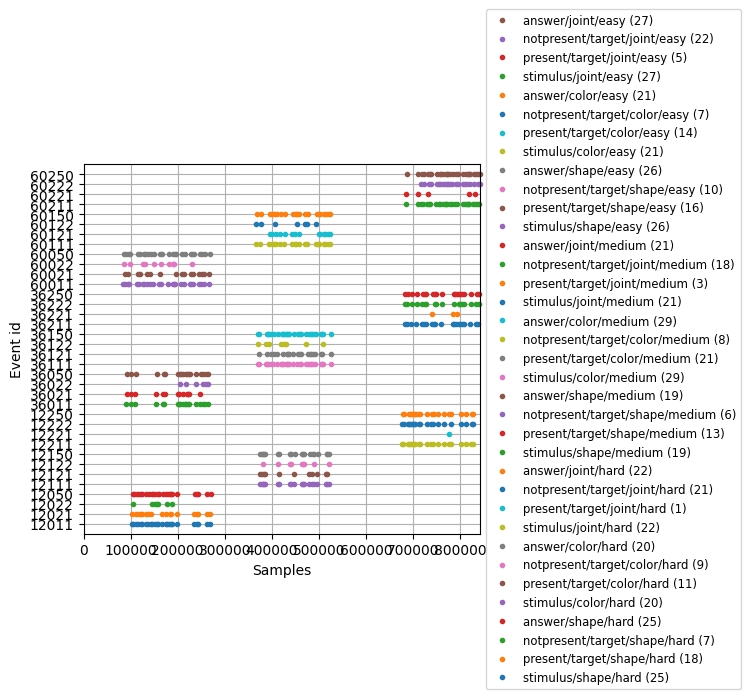

In [48]:
mne.viz.plot_events(events, event_id=event_id);

In [49]:
# setting a time window
tmin, tmax = -0.1, 0.7

# reject-criterion (rejecting everything above or under this threshold)
reject = {'eeg': 150e-6}

In [50]:
# setting a time window
tmin, tmax = -0.1, 0.7

# reject-criterion (rejecting everything above or under this threshold)
reject = {'eeg': 150e-6}

epochs = mne.Epochs(raw, events, event_id=event_id, tmin=tmin, tmax=tmax, baseline=(tmin, 0), picks=['eeg'], preload=True, reject=reject, reject_by_annotation=True)

outpath = os.path.join(os.getcwd(), 'epochs')

if not os.path.exists(outpath):
    os.makedirs(outpath)

epochs.save(os.path.join(outpath, 'epochs-exam_ica.fif'), overwrite=True)

Not setting metadata
630 matching events found
Applying baseline correction (mode: mean)
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Using data from preloaded Raw for 630 events and 801 original time points ...
0 bad epochs dropped
Overwriting existing file.
Overwriting existing file.


/tmp/ipykernel_2153/3007720132.py:14: RuntimeWarning: This filename (/work/AkaranSivakumar#4825/CogNeuro24/own_experiment/epochs/epochs-exam_ica.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs.save(os.path.join(outpath, 'epochs-exam_ica.fif'), overwrite=True)


In [ ]:
#ica = mne.preprocessing.ICA(n_components=0.95, random_state=7, max_iter='auto').fit(epochs)
#ecg_inds, scores = ica.find_bads_ecg(ecg_epochs, threshold="auto")

#ica.plot_components(ecg_inds)

Fitting ICA to data using 26 channels (please be patient, this may take a while)


    Applying projection operator with 1 vector (pre-whitener computation)


/tmp/ipykernel_7273/1087000736.py:1: RuntimeWarning: The epochs you passed to ICA.fit() were baseline-corrected. However, we suggest to fit ICA only on data that has been high-pass filtered, but NOT baseline-corrected.
  ica = mne.preprocessing.ICA(n_components=0.95, random_state=7, max_iter='auto').fit(epochs)


    Applying projection operator with 1 vector (pre-whitener application)
Selecting by explained variance: 7 components
    Applying projection operator with 1 vector (pre-whitener application)
Fitting ICA took 4.9s.


NameError: name 'ecg_epochs' is not defined

In [51]:
# downsampling
epochs.resample(250)
print(epochs)

<Epochs |  630 events (all good), -0.1 – 0.696 s, baseline -0.1 – 0 s, ~25.0 MB, data loaded,
 'stimulus/shape/easy': 26
 'present/target/shape/easy': 16
 'notpresent/target/shape/easy': 10
 'answer/shape/easy': 26
 'stimulus/color/easy': 21
 'present/target/color/easy': 14
 'notpresent/target/color/easy': 7
 'answer/color/easy': 21
 'stimulus/joint/easy': 27
 'present/target/joint/easy': 5
 and 26 more events ...>


In [52]:
data = epochs.get_data(copy=True)
data.shape

(630, 26, 200)

In [55]:
# Saving data to R

## Condition
target_shape_epochs = epochs['target/shape']
target_color_epochs = epochs['target/color']
target_joint_epochs = epochs['target/joint']

# Shape 
data_shape = target_shape_epochs.get_data(picks=["Oz", "O1", "O2"],tmin=0.1,tmax=0.3)
data_shape = np.mean(data_shape, axis=1) # averaging over the third dimension of the data
data_shape = np.mean(data_shape, axis=0) # averaging over the second dimension of the data
print(data_shape.shape)
shape = data_shape.shape
index = pd.MultiIndex.from_product([range(s)for s in shape])
shape_cond = pd.DataFrame({'data_shape': data_shape.flatten()}, index=index).reset_index()
shape_cond.to_csv('data_vis_shape.csv', index=False)

# Color
data_color = target_color_epochs.get_data(picks=["Oz", "O1", "O2"],tmin=0.1,tmax=0.3)
data_color = np.mean(data_color, axis=1) # averaging over the third dimension of the data
data_color = np.mean(data_color, axis=0) # averaging over the second dimension of the data
print(data_color.shape)
shape = data_color.shape
index = pd.MultiIndex.from_product([range(s)for s in shape])
color_cond = pd.DataFrame({'data_color': data_color.flatten()}, index=index).reset_index()
color_cond.to_csv('data_vis_color.csv', index=False)

# Joint
data_joint = target_joint_epochs.get_data(picks=["Oz", "O1", "O2"],tmin=0.1,tmax=0.3)
data_joint = np.mean(data_joint, axis=1) # averaging over the third dimension of the data
data_joint = np.mean(data_joint, axis=0) # averaging over the second dimension of the data
print(data_joint.shape)
shape = data_joint.shape
index = pd.MultiIndex.from_product([range(s)for s in shape])
joint_cond = pd.DataFrame({'data_joint': data_joint.flatten()}, index=index).reset_index()
joint_cond.to_csv('data_vis_joint.csv', index=False)




(50,)
(50,)
(50,)


In [56]:
## Difficulty
target_easy_epochs = epochs['target/easy']
target_medium_epochs = epochs['target/medium']
target_hard_epochs = epochs['target/hard']

# Easy 
data_easy = target_easy_epochs.get_data(picks=["Oz", "O1", "O2"],tmin=0.1,tmax=0.3)
data_easy = np.mean(data_easy, axis=1) # averaging over the third dimension of the data
data_easy = np.mean(data_easy, axis=0) # averaging over the second dimension of the data
print(data_easy.shape)
shape = data_easy.shape
index = pd.MultiIndex.from_product([range(s)for s in shape])
easy_cond = pd.DataFrame({'data_easy': data_easy.flatten()}, index=index).reset_index()
easy_cond.to_csv('data_vis_easy.csv', index=False)

# Medium
data_medium = target_medium_epochs.get_data(picks=["Oz", "O1", "O2"],tmin=0.1,tmax=0.3)
data_medium = np.mean(data_medium, axis=1) # averaging over the third dimension of the data
data_medium = np.mean(data_medium, axis=0) # averaging over the second dimension of the data
print(data_medium.shape)
shape = data_medium.shape
index = pd.MultiIndex.from_product([range(s)for s in shape])
medium_cond = pd.DataFrame({'data_medium': data_medium.flatten()}, index=index).reset_index()
medium_cond.to_csv('data_vis_medium.csv', index=False)

# Hard
data_hard = target_hard_epochs.get_data(picks=["Oz", "O1", "O2"],tmin=0.1,tmax=0.3)
data_hard = np.mean(data_hard, axis=1) # averaging over the third dimension of the data
data_hard = np.mean(data_hard, axis=0) # averaging over the second dimension of the data
print(data_hard.shape)
shape = data_hard.shape
index = pd.MultiIndex.from_product([range(s)for s in shape])
hard_cond = pd.DataFrame({'data_hard': data_hard.flatten()}, index=index).reset_index()
hard_cond.to_csv('data_vis_hard.csv', index=False)

(50,)
(50,)
(50,)


Not setting metadata
70 matching events found
No baseline correction applied
0 projection items activated


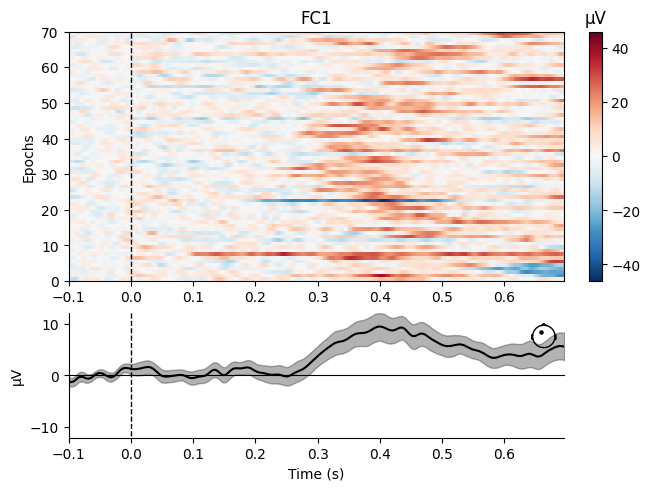

Not setting metadata
70 matching events found
No baseline correction applied
0 projection items activated


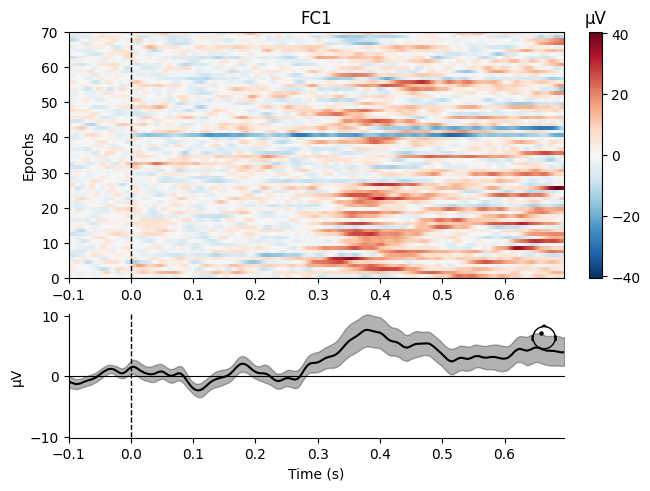

Not setting metadata
70 matching events found
No baseline correction applied
0 projection items activated


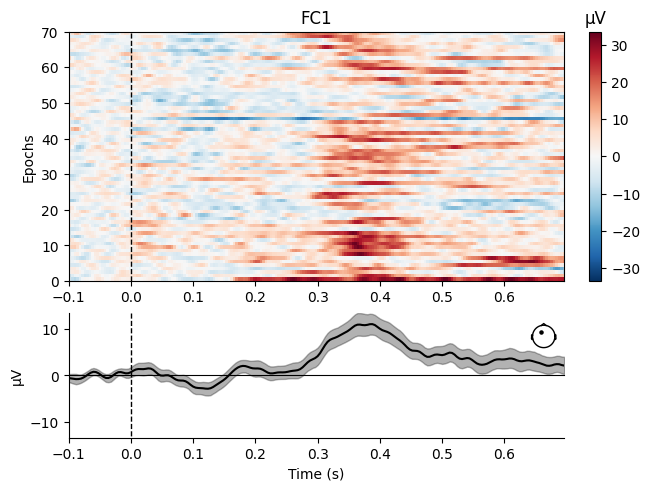

In [ ]:
# grouping epochs
#shape_epochs = epochs[["11", "21", "22", "50"]]
#color_epochs = epochs[["111", "121", "122", "150"]]
#joint_epochs = epochs[["211", "221", "222", "250"]]

# Grouping epochs by difficulty
easy_epochs = epochs['easy']
medium_epochs = epochs['medium']
hard_epochs = epochs['hard']

#grouping by 3x3 matrix
easy_shape_epochs = epochs['target/shape/easy']
easy_color_epochs = epochs['target/color/easy']
easy_joint_epochs = epochs['target/joint/easy']

medium_shape_epochs = epochs['target/shape/medium']
medium_color_epochs = epochs['target/color/medium']
medium_joint_epochs = epochs['target/joint/medium']

hard_shape_epochs = epochs['target/shape/hard']
hard_color_epochs = epochs['target/color/hard']
hard_joint_epochs = epochs['target/joint/hard']


# alternative way (but I don't think you wanna group your epochs like this...)
shape_epochs = epochs['shape']
color_epochs = epochs['color']
joint_epochs = epochs['joint']

#idfficulty
target_easy_epochs = epochs['target/easy']
target_medium_epochs = epochs['target/medium']
target_hard_epochs = epochs['target/hard']



#Condition
target_shape_epochs = epochs['target/shape']
target_color_epochs = epochs['target/color']
target_joint_epochs = epochs['target/joint']


target_shape_epochs.plot_image(picks=["FC1"]);
target_color_epochs.plot_image(picks=["FC1"]);
target_joint_epochs.plot_image(picks=["FC1"]);

#easy_shape_epochs.plot_image(picks=["Oz"]);
#easy_color_epochs.plot_image(picks=["Oz"]);
#easy_joint_epochs.plot_image(picks=["Oz"]);


#target_easy_epochs.plot_image(picks=["Oz"]);
#target_medium_epochs.plot_image(picks=["Oz"]);
#target_hard_epochs.plot_image(picks=["Oz"]);
#epochs.plot_sensors(show_names=True):

combining channels using GFP (eeg channels)
combining channels using GFP (eeg channels)
combining channels using GFP (eeg channels)


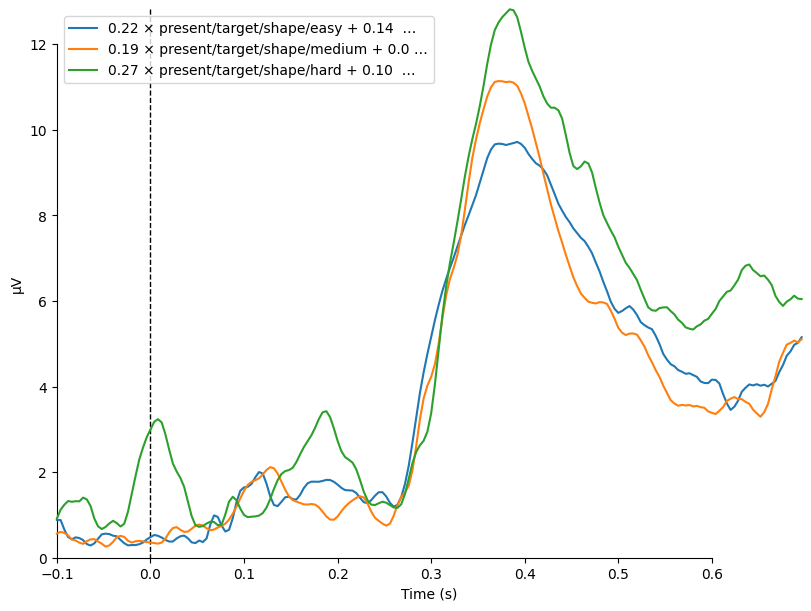

(26, 200)
combining channels using GFP (eeg channels)
combining channels using GFP (eeg channels)
combining channels using GFP (eeg channels)


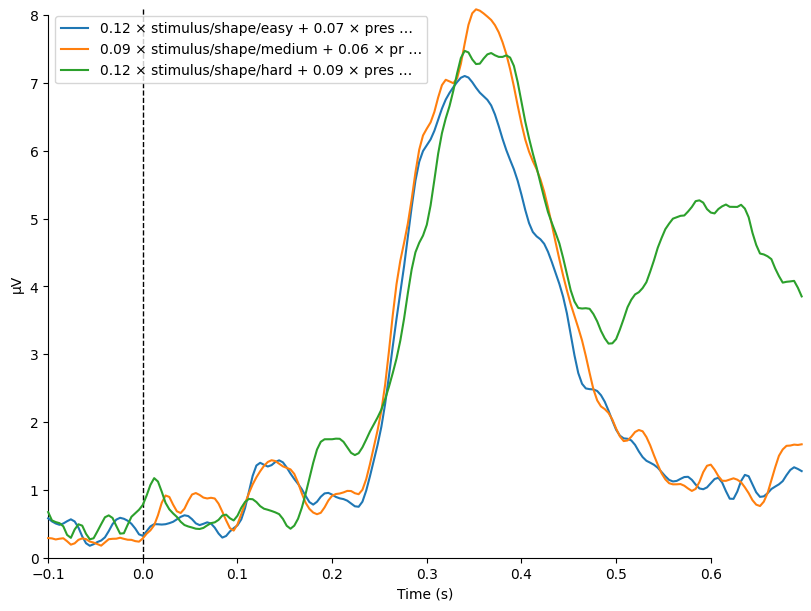

[<Figure size 800x600 with 1 Axes>]

In [ ]:
# Grouping epochs by difficulty

target_evoked_easy = target_easy_epochs.average()
target_evoked_medium = target_medium_epochs.average()
target_evoked_hard = target_hard_epochs.average()

mne.viz.plot_compare_evokeds(evokeds=[target_evoked_easy, target_evoked_medium, target_evoked_hard])

evoked_easy = easy_epochs.average(method="mean", by_event_type=False)
evoked_medium = medium_epochs.average(method="mean", by_event_type=False)
evoked_hard = hard_epochs.average(method="mean", by_event_type=False)
data = evoked_easy.get_data()
print(data.shape)

mne.viz.plot_compare_evokeds(evokeds=[evoked_easy, evoked_medium, evoked_hard])

In [ ]:
evoked_easy.get_data().shape

(26, 200)

Projections have already been applied. Setting proj attribute to True.


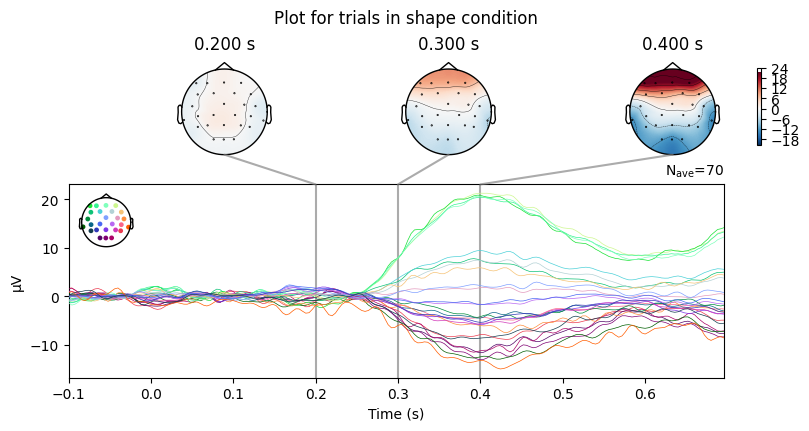

In [ ]:
target_evoked_shape = target_shape_epochs.average()
target_evoked_shape.plot_joint(title='Plot for trials in shape condition', times=[0.2, 0.3, 0.4]);


Projections have already been applied. Setting proj attribute to True.


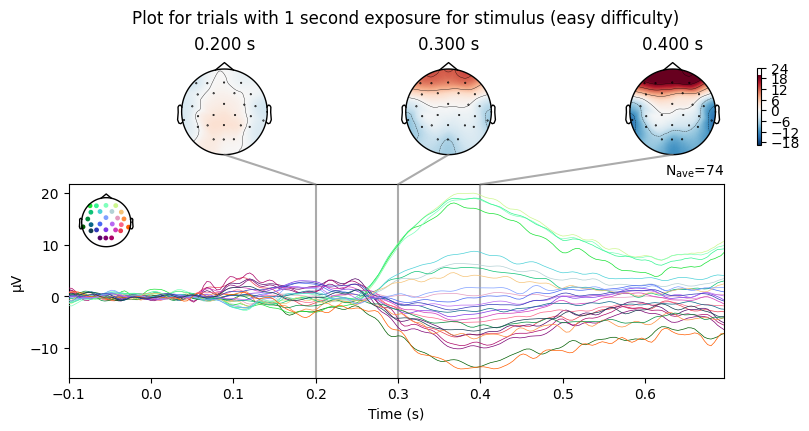

Projections have already been applied. Setting proj attribute to True.


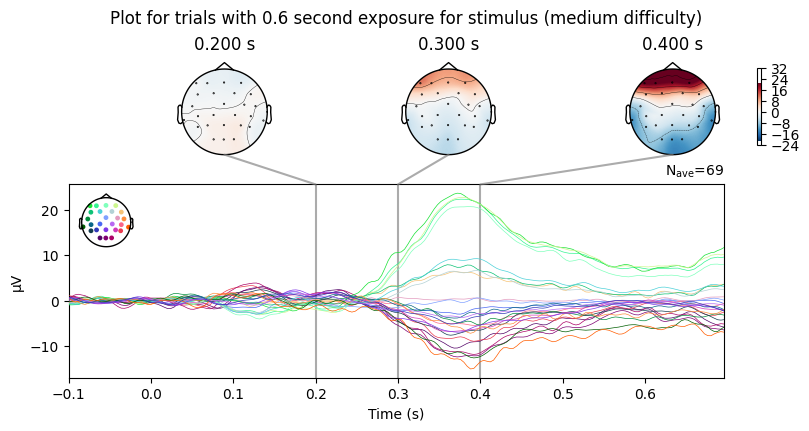

Projections have already been applied. Setting proj attribute to True.


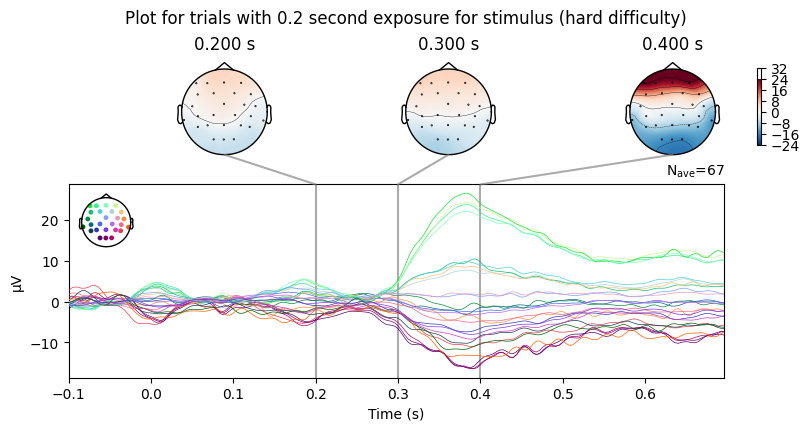

In [ ]:
target_evoked_easy.plot_joint(title='Plot for trials with 1 second exposure for stimulus (easy difficulty)', times=[0.2, 0.3, 0.4]);
target_evoked_medium.plot_joint(title='Plot for trials with 0.6 second exposure for stimulus (medium difficulty)',  times=[0.2, 0.3, 0.4]);
target_evoked_hard.plot_joint(title = 'Plot for trials with 0.2 second exposure for stimulus (hard difficulty)',  times=[0.2, 0.3, 0.4]);


# Clusterbased Permutation testing for difficulty


In [ ]:
# obtain the data as a 3D matrix and transpose it such that
# the dimensions are as expected for the cluster permutation test:
# n_epochs × n_times × n_channels
data_easy = np.transpose(target_easy_epochs.get_data(copy = True), (0, 2, 1))
data_medium = np.transpose(target_medium_epochs.get_data(copy = True), (0, 2, 1))
data_hard = np.transpose(target_hard_epochs.get_data(copy = True), (0, 2, 1))

print(data_easy.shape)
print(data_medium.shape)
print(data_hard.shape)

(74, 200, 26)
(69, 200, 26)
(67, 200, 26)


## Get adjecency matrix
We need to define the adjacency matrix to be able to cluster the data. This is a matrix that defines which channels are neighbours.

In [ ]:
adjacency, ch_names = mne.channels.find_ch_adjacency(epochs.info, ch_type="eeg")

Could not find a adjacency matrix for the data. Computing adjacency based on Delaunay triangulations.
-- number of adjacent vertices : 26


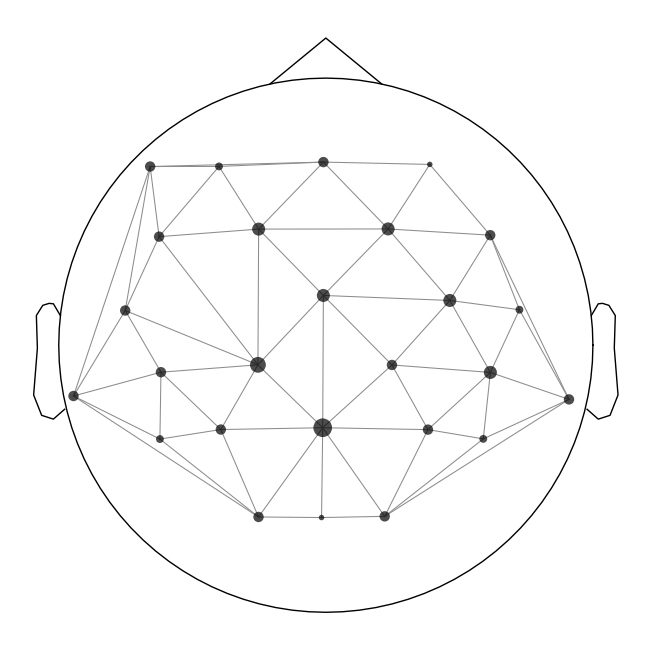

In [ ]:
# plot the adjacency
mne.viz.plot_ch_adjacency(epochs.info, adjacency, ch_names);

In [ ]:
# set family-wise p-value
p_accept = 0.05

# running the permutation test with 2000 permutations and a random seed of 4
cluster_stats = mne.stats.spatio_temporal_cluster_test(
    [data_easy, data_hard],
    n_permutations=1000, 
    tail=0,
    threshold = 6,
    n_jobs=-1, 
    adjacency=adjacency, 
    seed=4)

# selecting clusters with significant p-values
F_obs, clusters, p_values, _ = cluster_stats
good_cluster_inds = np.where(p_values < p_accept)[0]

stat_fun(H1): min=2.775896252064205e-07 max=67.83732398832703
Running initial clustering …
Found 24 clusters


  0%|          | Permuting : 0/999 [00:00<?,       ?it/s]

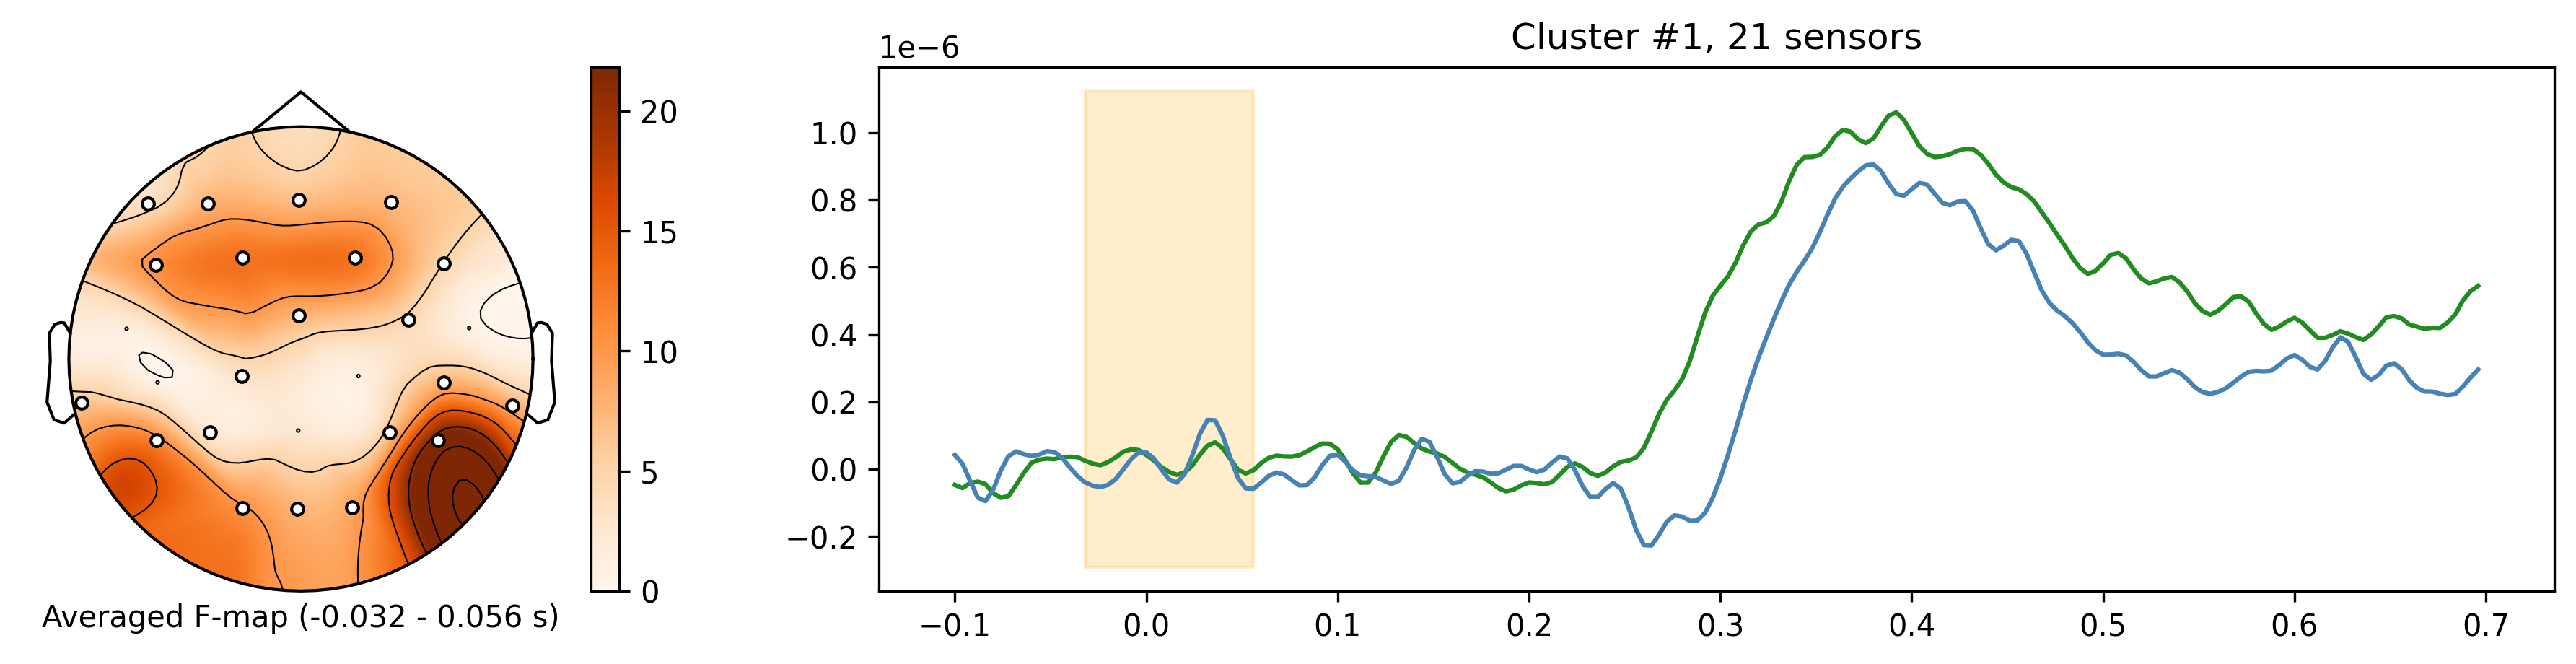

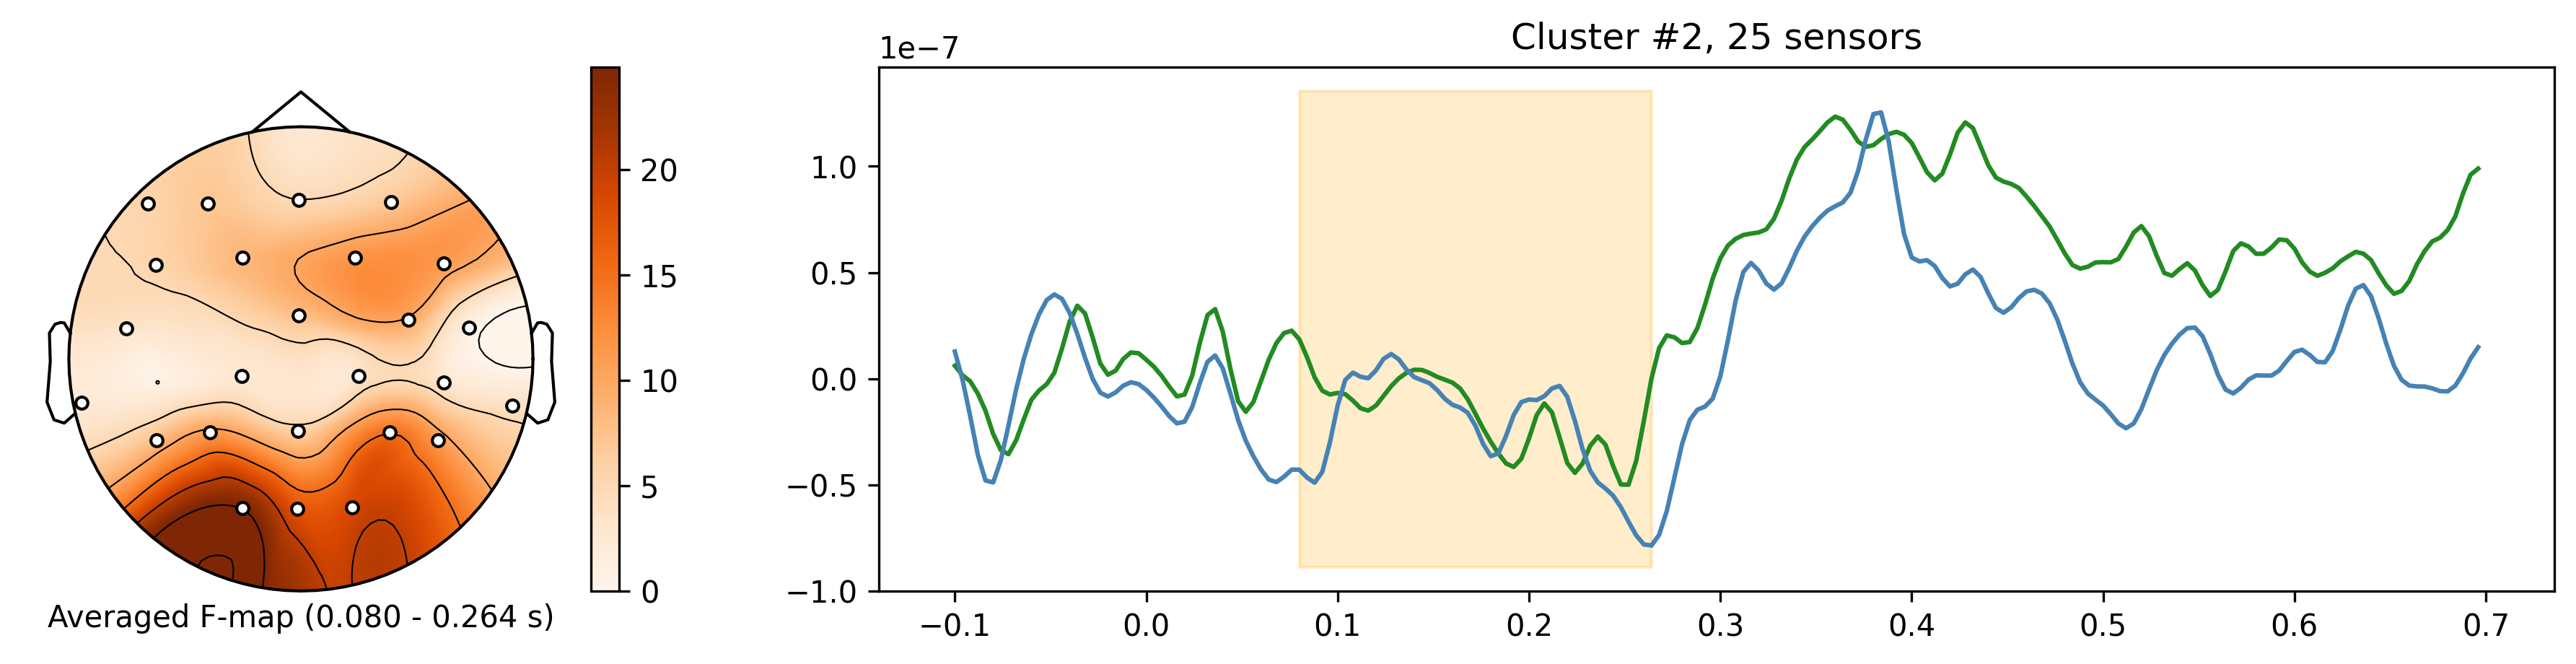

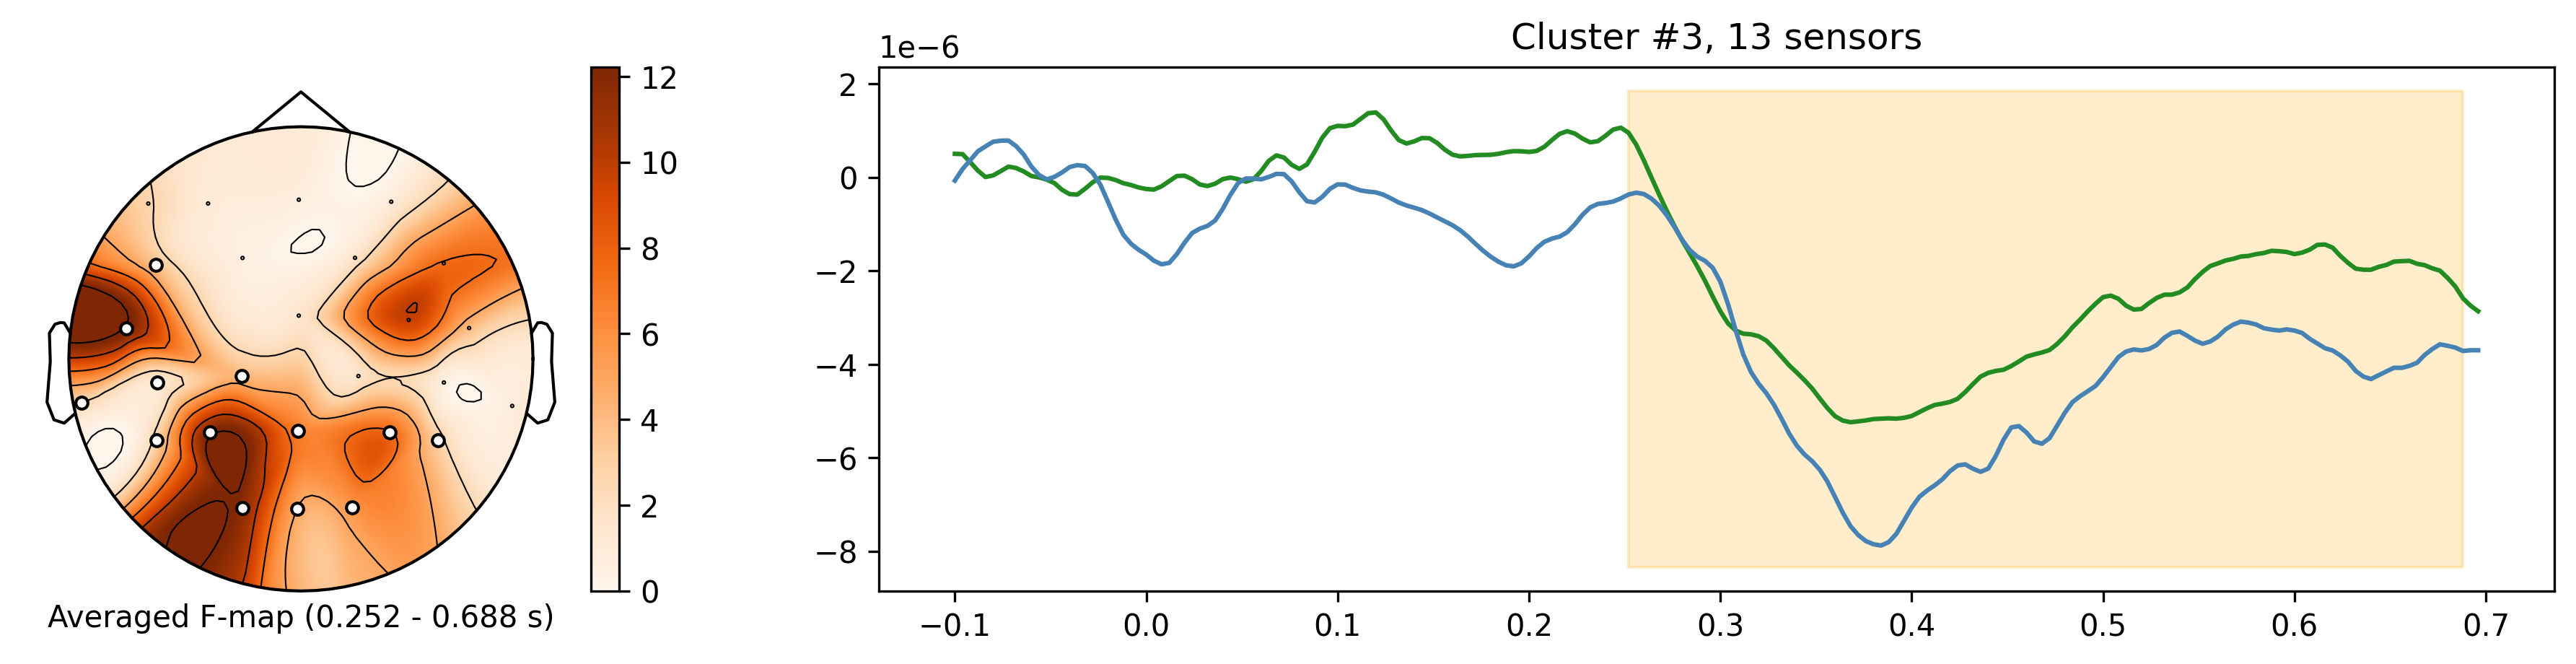

In [ ]:
# configuration of variables for visualisation
colors = {"Easy": "forestgreen", "Hard": 'steelblue'}

if len(good_cluster_inds) == 0:
    print('No significant clusters found')

else:
    # looping over clusters
    for i_clu, clu_idx in enumerate(good_cluster_inds):
        # unpacking cluster information
        time_inds, space_inds = np.squeeze(clusters[clu_idx])
        ch_inds = np.unique(space_inds)
        time_inds = np.unique(time_inds)

        # topography for stats
        f_map = F_obs[time_inds, ...].mean(axis=0)

        # getting signals at the sensors contributing to the cluster
        sig_times = epochs.times[time_inds]

        # creating spatial mask
        mask = np.zeros((f_map.shape[0], 1), dtype=bool)
        mask[ch_inds, :] = True

        # initialising the figure
        fig, ax_topo = plt.subplots(1, 1, figsize=(12, 4), dpi=300)

        # plotting average test statistic and mark significant sensors
        image = mne.viz.plot_topomap(
            f_map, 
            epochs.info,
            axes=ax_topo, 
            cmap="Oranges", 
            show=False, 
            mask=mask
            )

        # creating additional axes (for ERP and colorbar)
        divider = make_axes_locatable(ax_topo)

        # adding axes for colourbar
        ax_colorbar = divider.append_axes('right', size='5%', pad=0.05)
        plt.colorbar(image[0], cax=ax_colorbar)
        ax_topo.set_xlabel(f"Averaged F-map ({sig_times[0]:0.3f} - {sig_times[-1]:0.3f} s)")

        # adding new axis for time courses and plot time courses
        ax_signals = divider.append_axes('right', size='300%', pad=1.2)
        title = f'Cluster #{i_clu + 1}, { len(ch_inds)} sensors'
        
        ax_signals.set_title(title)

        # plot the ERPs in the significant cluster 
        ax_signals.plot(epochs.times, data_easy[:, :, ch_inds].mean(axis=(0, 2)), color=colors["Easy"], label="Easy")
        ax_signals.plot(epochs.times, data_hard[:, :, ch_inds].mean(axis=(0, 2)), color=colors["Hard"], label="Hard")
        
        # plotting temporal cluster extent
        ymin, ymax = ax_signals.get_ylim()

        # fill between ymin and ymax for all clusters 
        ax_signals.fill_betweenx((ymin, ymax), sig_times[0], sig_times[-1],
                                color='orange', alpha=0.2)

        plt.tight_layout()

# Clusterbased Permutation testing for difficulty (medium vs easy)

In [ ]:
# set family-wise p-value
p_accept = 0.05

# running the permutation test with 2000 permutations and a random seed of 4
cluster_stats = mne.stats.spatio_temporal_cluster_test(
    [data_easy, data_medium],
    n_permutations=1000, 
    tail=0,
    n_jobs=-1, 
    adjacency=adjacency, 
    seed=4)

# selecting clusters with significant p-values
F_obs, clusters, p_values, _ = cluster_stats
good_cluster_inds = np.where(p_values < p_accept)[0]

Using a threshold of 3.908258
stat_fun(H1): min=6.8184082798389e-07 max=18.146205348163345
Running initial clustering …
Found 44 clusters


/tmp/ipykernel_50413/1738638491.py:5: RuntimeWarning: Ignoring argument "tail", performing 1-tailed F-test
  cluster_stats = mne.stats.spatio_temporal_cluster_test(


  0%|          | Permuting : 0/999 [00:00<?,       ?it/s]

In [ ]:
# configuration of variables for visualisation
colors = {"Easy": "forestgreen", "Medium": 'orange'}

if len(good_cluster_inds) == 0:
    print('No significant clusters found')

else:
    # looping over clusters
    for i_clu, clu_idx in enumerate(good_cluster_inds):
        # unpacking cluster information
        time_inds, space_inds = np.squeeze(clusters[clu_idx])
        ch_inds = np.unique(space_inds)
        time_inds = np.unique(time_inds)

        # topography for stats
        f_map = F_obs[time_inds, ...].mean(axis=0)

        # getting signals at the sensors contributing to the cluster
        sig_times = epochs.times[time_inds]

        # creating spatial mask
        mask = np.zeros((f_map.shape[0], 1), dtype=bool)
        mask[ch_inds, :] = True

        # initialising the figure
        fig, ax_topo = plt.subplots(1, 1, figsize=(12, 4), dpi=300)

        # plotting average test statistic and mark significant sensors
        image = mne.viz.plot_topomap(
            f_map, 
            epochs.info,
            axes=ax_topo, 
            cmap="Oranges", 
            show=False, 
            mask=mask
            )

        # creating additional axes (for ERP and colorbar)
        divider = make_axes_locatable(ax_topo)

        # adding axes for colourbar
        ax_colorbar = divider.append_axes('right', size='5%', pad=0.05)
        plt.colorbar(image[0], cax=ax_colorbar)
        ax_topo.set_xlabel(f"Averaged F-map ({sig_times[0]:0.3f} - {sig_times[-1]:0.3f} s)")

        # adding new axis for time courses and plot time courses
        ax_signals = divider.append_axes('right', size='300%', pad=1.2)
        title = f'Cluster #{i_clu + 1}, { len(ch_inds)} sensors'
        
        ax_signals.set_title(title)

        # plot the ERPs in the significant cluster 
        ax_signals.plot(epochs.times, data_easy[:, :, ch_inds].mean(axis=(0, 2)), color=colors["Easy"], label="Easy")
        ax_signals.plot(epochs.times, data_hard[:, :, ch_inds].mean(axis=(0, 2)), color=colors["Medium"], label="Medium")
        
        # plotting temporal cluster extent
        ymin, ymax = ax_signals.get_ylim()

        # fill between ymin and ymax for all clusters 
        ax_signals.fill_betweenx((ymin, ymax), sig_times[0], sig_times[-1],
                                color='orange', alpha=0.2)

        plt.tight_layout()

No significant clusters found


# Clusterbased Permutation testing for difficulty (medium vs hard)

In [ ]:
# set family-wise p-value
p_accept = 0.05

# running the permutation test with 2000 permutations and a random seed of 4
cluster_stats = mne.stats.spatio_temporal_cluster_test(
    [data_hard, data_medium],
    n_permutations=1000, 
    tail=0,
    n_jobs=-1, 
    adjacency=adjacency, 
    seed=4)

# selecting clusters with significant p-values
F_obs, clusters, p_values, _ = cluster_stats
good_cluster_inds = np.where(p_values < p_accept)[0]

Using a threshold of 3.911795
stat_fun(H1): min=1.071304220528431e-07 max=64.77842505843753
Running initial clustering …
Found 15 clusters


/tmp/ipykernel_50413/2626470406.py:5: RuntimeWarning: Ignoring argument "tail", performing 1-tailed F-test
  cluster_stats = mne.stats.spatio_temporal_cluster_test(


  0%|          | Permuting : 0/999 [00:00<?,       ?it/s]

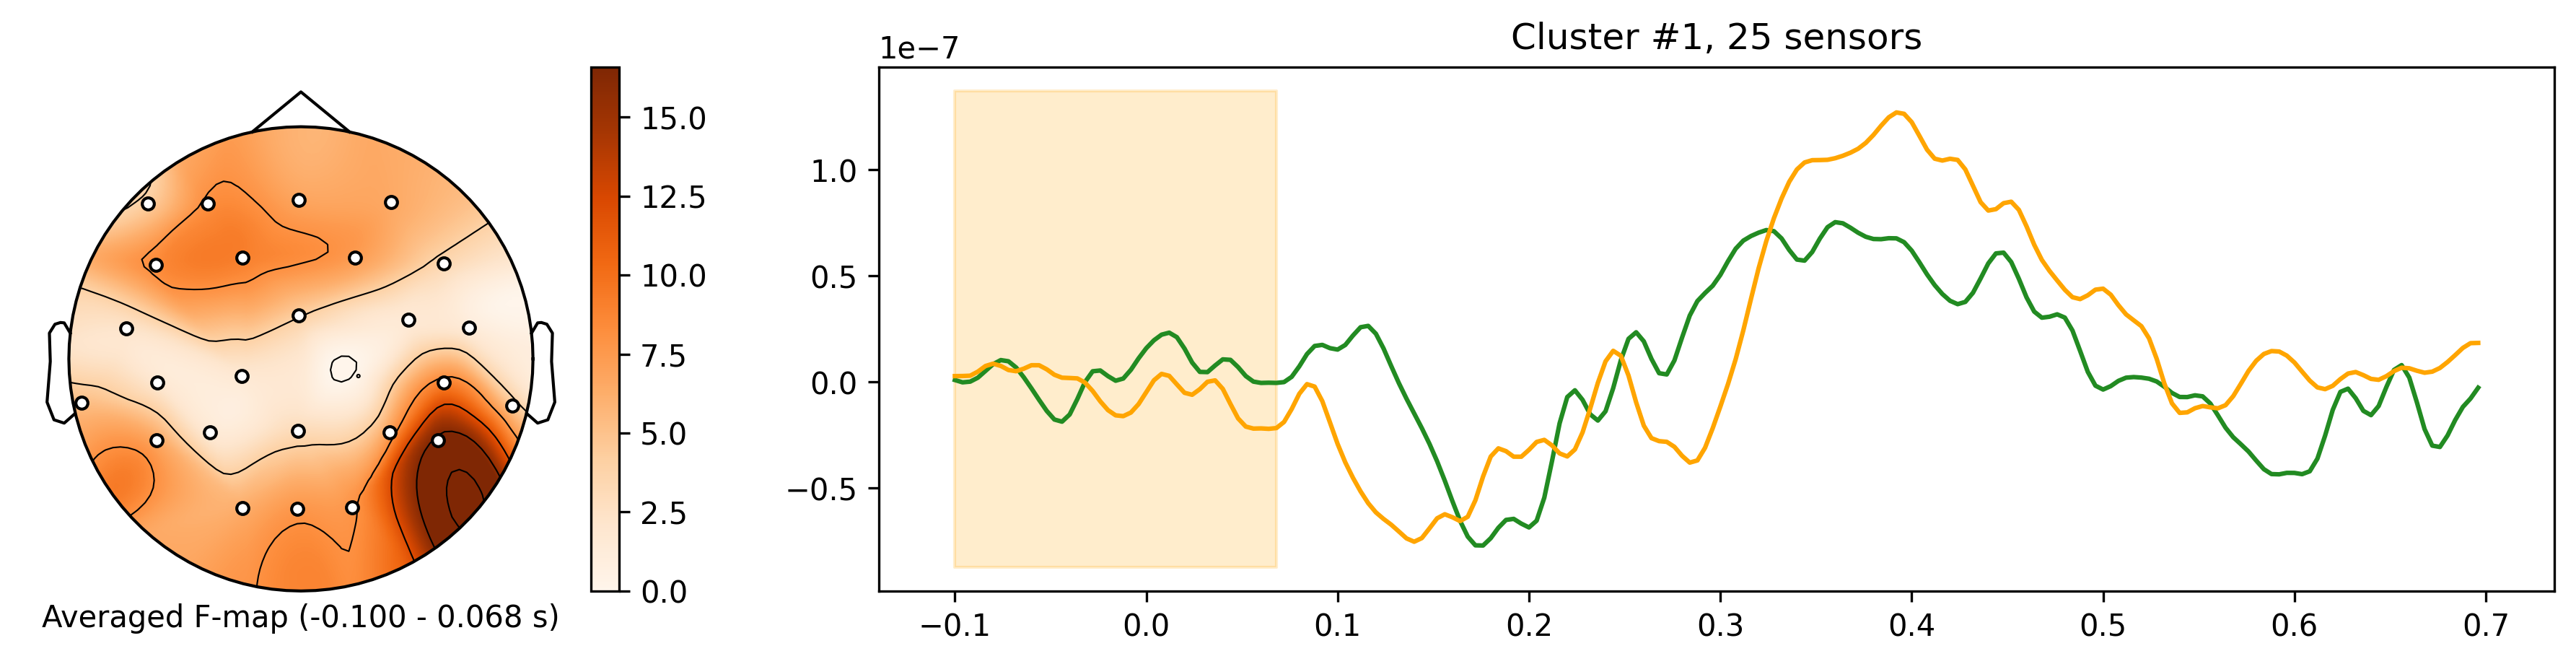

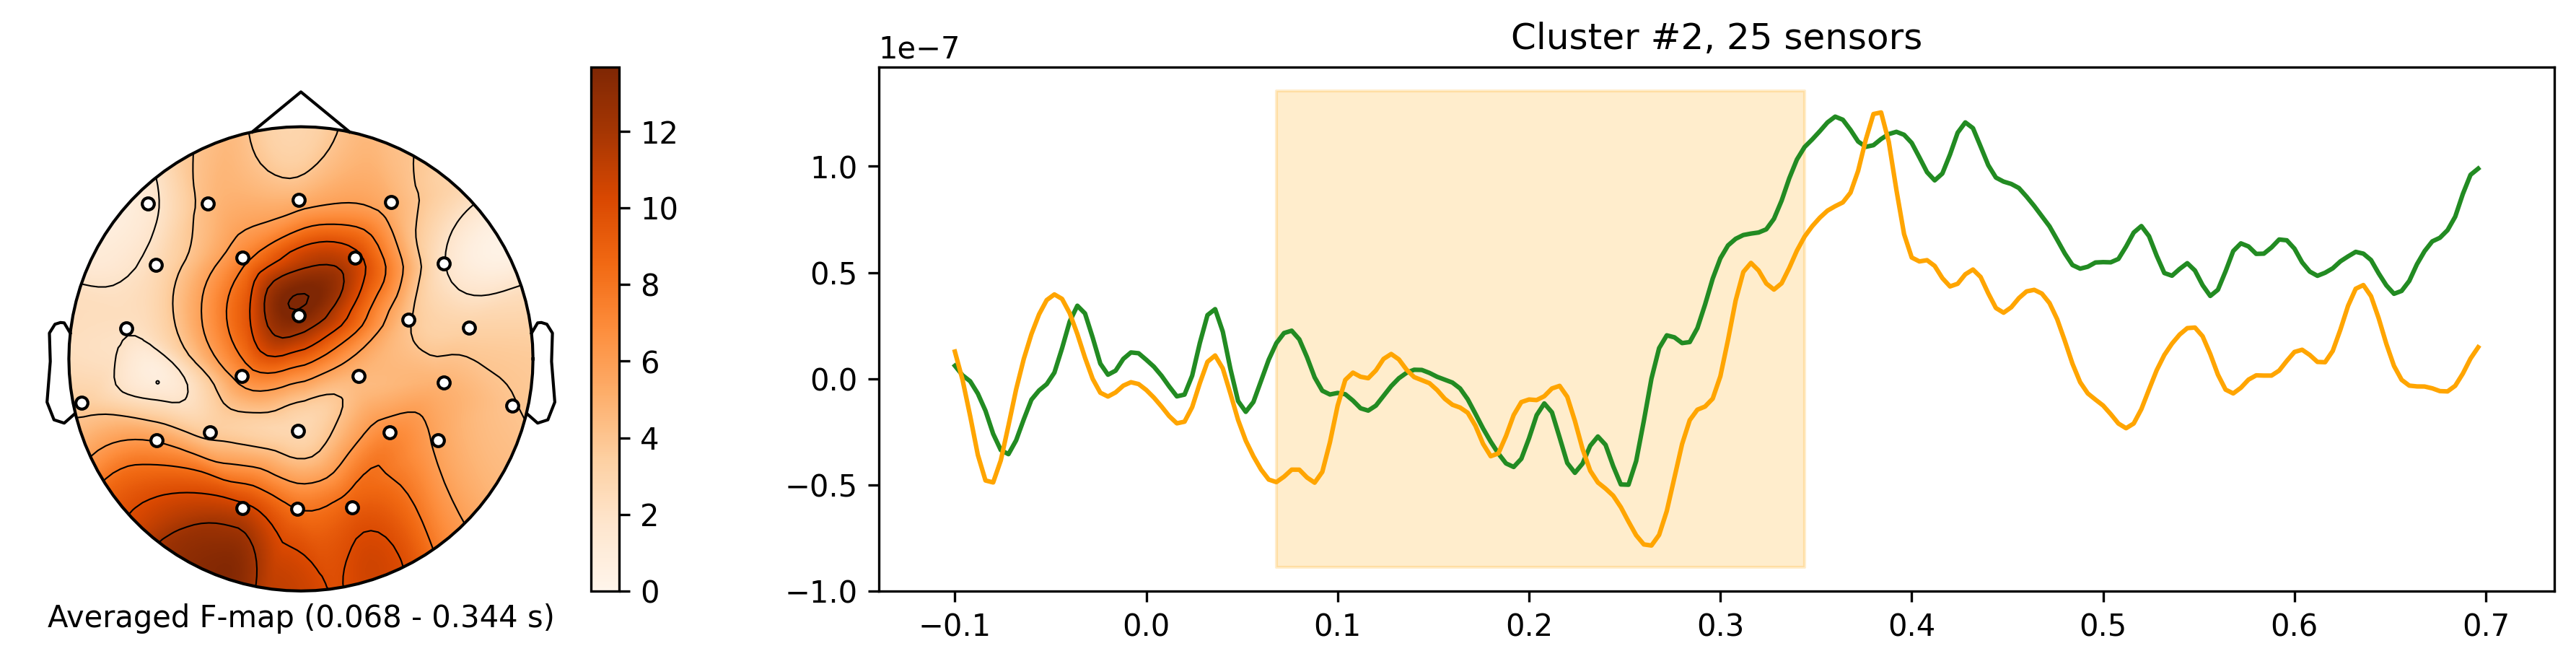

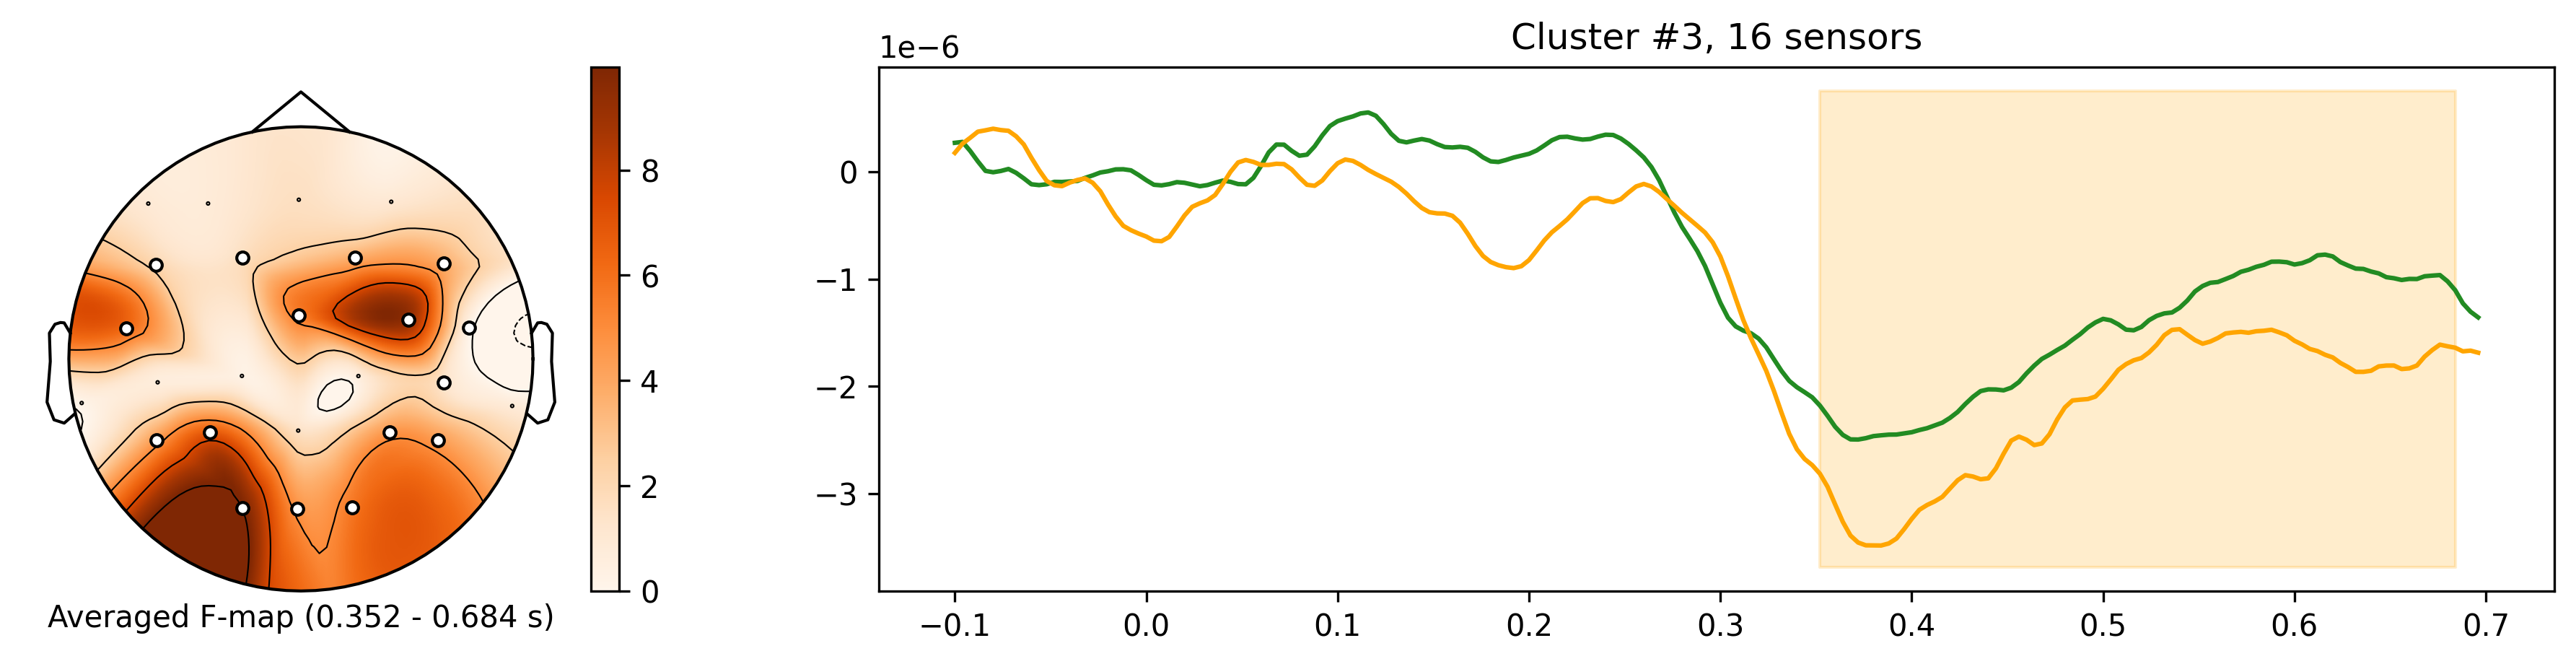

In [ ]:
# configuration of variables for visualisation
colors = {"Hard": "forestgreen", "Medium": 'orange'}

if len(good_cluster_inds) == 0:
    print('No significant clusters found')

else:
    # looping over clusters
    for i_clu, clu_idx in enumerate(good_cluster_inds):
        # unpacking cluster information
        time_inds, space_inds = np.squeeze(clusters[clu_idx])
        ch_inds = np.unique(space_inds)
        time_inds = np.unique(time_inds)

        # topography for stats
        f_map = F_obs[time_inds, ...].mean(axis=0)

        # getting signals at the sensors contributing to the cluster
        sig_times = epochs.times[time_inds]

        # creating spatial mask
        mask = np.zeros((f_map.shape[0], 1), dtype=bool)
        mask[ch_inds, :] = True

        # initialising the figure
        fig, ax_topo = plt.subplots(1, 1, figsize=(12, 4), dpi=300)

        # plotting average test statistic and mark significant sensors
        image = mne.viz.plot_topomap(
            f_map, 
            epochs.info,
            axes=ax_topo, 
            cmap="Oranges", 
            show=False, 
            mask=mask
            )

        # creating additional axes (for ERP and colorbar)
        divider = make_axes_locatable(ax_topo)

        # adding axes for colourbar
        ax_colorbar = divider.append_axes('right', size='5%', pad=0.05)
        plt.colorbar(image[0], cax=ax_colorbar)
        ax_topo.set_xlabel(f"Averaged F-map ({sig_times[0]:0.3f} - {sig_times[-1]:0.3f} s)")

        # adding new axis for time courses and plot time courses
        ax_signals = divider.append_axes('right', size='300%', pad=1.2)
        title = f'Cluster #{i_clu + 1}, { len(ch_inds)} sensors'
        
        ax_signals.set_title(title)

        # plot the ERPs in the significant cluster 
        ax_signals.plot(epochs.times, data_easy[:, :, ch_inds].mean(axis=(0, 2)), color=colors["Hard"], label="Hard")
        ax_signals.plot(epochs.times, data_hard[:, :, ch_inds].mean(axis=(0, 2)), color=colors["Medium"], label="Medium")
        
        # plotting temporal cluster extent
        ymin, ymax = ax_signals.get_ylim()

        # fill between ymin and ymax for all clusters 
        ax_signals.fill_betweenx((ymin, ymax), sig_times[0], sig_times[-1],
                                color='orange', alpha=0.2)

        plt.tight_layout()

# Linear regression

In [ ]:
from mne.stats import fdr_correction, linear_regression
from mne.viz import plot_compare_evokeds

In [ ]:
name = "Condition"
combined_df[name] = pd.cut(combined_df[name], 11, labels=False) / 10

UFuncTypeError: ufunc 'multiply' did not contain a loop with signature matching types (dtype('<U5'), dtype('float64')) -> None

In [ ]:
array = np.zeros((630, 2))

In [ ]:
res = linear_regression(epochs, array)
for cond in names:
    res[cond].beta.plot_joint(
        title=cond, ts_args=dict(time_unit="s"), topomap_args=dict(time_unit="s")
    )

Fitting linear model to epochs, (5200 targets, 2 regressors)


ValueError: cannot reshape array of size 0 into shape (26,200)